<a href="https://colab.research.google.com/github/TreeLiquid/Intro-to-ML/blob/main/Shigapov_4105_HW4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
import seaborn as sea
from matplotlib.colors import ListedColormap

In [63]:
from google.colab import drive
drive.mount('/content/drive')

#Obtain file data
filepath = '/content/drive/My Drive/Fall-2023/Intro-to-ML/Datasets/Housing.csv'
HD = pd.DataFrame(pd.read_csv(filepath))
HD.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [64]:
#Converting True/False to 1/0
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
varlist2 = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

#Map Func (I am not converting furnishing status as the HW doesn't require me to)
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

HD[varlist] = HD[varlist].apply(binary_map)
HD.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [65]:
X = HD.iloc[:, 1:12]
y = HD.iloc[:, 0].values

X = pd.DataFrame(X)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0


In [66]:
def featureReduction(x_train, x_test, K):
  pca = PCA(n_components = K)
  x_train_tran = pca.fit_transform(x_train)
  x_test_tran = pca.fit_transform(x_test)
  return x_train_tran, x_test_tran

In [67]:
#Scaling
scale = StandardScaler()
X_std = scale.fit_transform(X)

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, test_size=0.2, random_state=0)

In [68]:
err_min = 1E6
errors = []

#Linear
for K in range(1,12):
  xtrt, xtet = featureReduction(X_train, X_test, K)
  classifier = SVC(kernel= 'linear', C = 1E4)
  classifier.fit(xtrt, y_train)
  y_prediction = classifier.predict(xtet)
  K_mse = mean_squared_error(y_test, y_prediction)
  errors.append(K_mse)

  if (K_mse < err_min):
    err_min = K_mse
    BestK = K

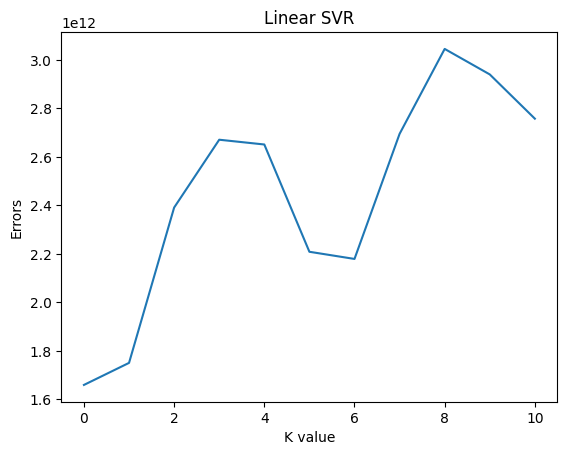

In [69]:
plt.plot(errors, label="Errors")
plt.xlabel("K value")
plt.ylabel("Errors")
plt.title("Linear SVR")
plt.show()
#print(BestK, '\n', K_mse)

In [70]:
#Poly
for K in range(1,12):
  xtrt, xtet = featureReduction(X_train, X_test, K)
  classifier = SVC(kernel= 'poly', C = 1E4)
  classifier.fit(xtrt, y_train)
  y_prediction = classifier.predict(xtet)
  K_mse = mean_squared_error(y_test, y_prediction)
  errors.append(K_mse)

  if (K_mse < err_min):
    err_min = K_mse
    BestK = K

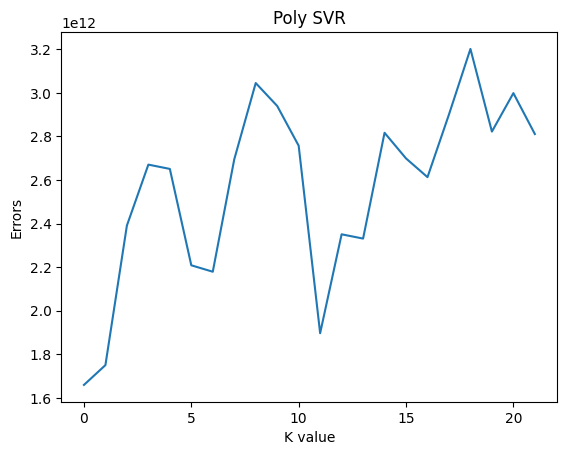

In [71]:
plt.plot(errors, label="Errors")
plt.xlabel("K value")
plt.ylabel("Errors")
plt.title("Poly SVR")
plt.show()
#print(BestK, '\n', K_mse)

In [72]:
#RBF
for K in range(1,12):
  xtrt, xtet = featureReduction(X_train, X_test, K)
  classifier = SVC(kernel= 'rbf', C = 1E4)
  classifier.fit(xtrt, y_train)
  y_prediction = classifier.predict(xtet)
  K_mse = mean_squared_error(y_test, y_prediction)
  errors.append(K_mse)

  if (K_mse < err_min):
    err_min = K_mse
    BestK = K

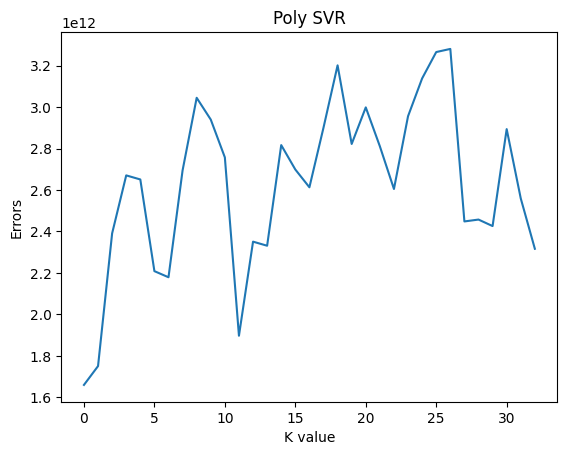

In [73]:
plt.plot(errors, label="Errors")
plt.xlabel("K value")
plt.ylabel("Errors")
plt.title("Poly SVR")
plt.show()
#print(BestK, '\n', K_mse)

In [74]:
#MSE
#Linear, Poly, RBF
c = 1E4

#Linear
lin = SVC(kernel= 'linear', C= c)
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_pred)
print(lin_mse)

#Poly
poly = SVC(kernel= 'poly', C= c, degree= 2)
poly.fit(X_train, y_train)
poly_pred = poly.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_pred)
print(poly_mse)

#RBF
RBF = SVC(kernel= 'rbf', C= c, gamma= 0.1)
RBF.fit(X_train, y_train)
RBF_pred = RBF.predict(X_test)
RBF_mse = mean_squared_error(y_test, RBF_pred)
print(RBF_mse)

1915195120389.9082
1911146860147.7065
1609447932316.5137


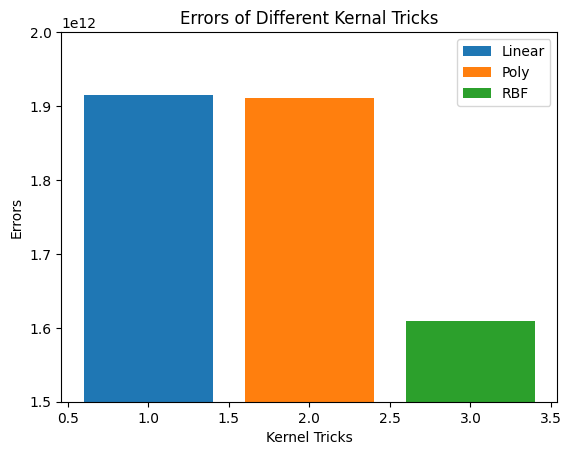

In [75]:
#Bar Graph Visualization
#Bars
plt.bar(height= lin_mse, x= 1, label= 'Linear')
plt.bar(height= poly_mse, x= 2, label= 'Poly')
plt.bar(height= RBF_mse, x=3, label= 'RBF')
#General
plt.xlabel("Kernel Tricks")
plt.ylabel("Errors")
plt.legend()
plt.title("Errors of Different Kernal Tricks")
plt.ylim((1.5E12,2E12))
plt.show()